In [27]:
import os
import glob2

import math

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from pymcr.mcr import McrAR
from pymcr.regressors import NNLS
from pymcr.constraints import ConstraintNonneg, ConstraintNorm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
dir_name = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Adam Projects\Scott\Chalmers\Ga PDH Chalmers\Short Data Range\GaAl2O3 RXN2'
fname = r'GaAl2O3_rxn2_NormXANES.csv'

In [3]:
df = pd.read_csv(os.path.join(dir_name, fname), sep = ',', index_col=0)

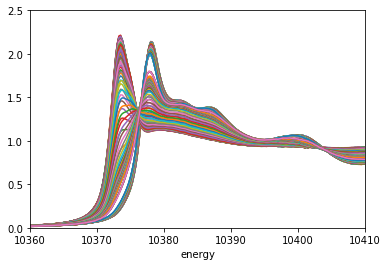

In [4]:
df.plot()
plt.xlim(10360,10410)
plt.ylim(0,2.5)
plt.legend().remove()

In [9]:
# Break dataframe into two arrays: energy (x axis) & spectra (data)

energy = df.index.values

spectra = df.to_numpy(copy = True)

In [23]:
num_spectra = np.shape(spectra)[1]
data_pts = np.shape(spectra)[0]

print(f'Number of Spectra: {num_spectra}')

Number of Spectra: 167


In [30]:
num_components = 3

scaler = math.floor(num_spectra/num_components)

initial_spectra = np.zeros([data_pts, num_components])

for i in range(num_components):
    if i != num_components-1:
        initial_spectra[:,i] = spectra[:,i*scaler]
    else:
        initial_spectra[:,i] = spectra[:,-1]
        

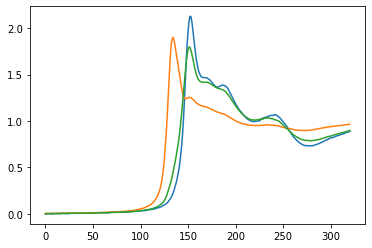

In [31]:
plt.plot(initial_spectra)

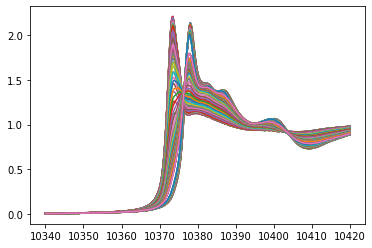

In [16]:
plt.plot(energy, spectra)

In [ ]:
D = spectra

intial_spectra = 

In [15]:
len(spectra[:,0])

321

In [ ]:
print(f'Number of Spectra: {len(df.columns)}')
print(f'Number of Datapoints Per Spectra: {len(df.index)}')

In [ ]:
n_components = len(df.columns)

pca = PCA( whiten=True) #n_components = n_components

# Generate Eigenspectra
score = pca.fit_transform(df)
print(f'Size of Eigenspectra array: {np.shape(score)}')

# Generate Percentae of Total Variance Explained (CVE)
cve = np.cumsum(pca.explained_variance_ratio_)
print(f'Lenght of CVE list: {len(cve)}')

In [ ]:
pca.__dict__.keys()

In [ ]:
# Plot n components of PCA - Overlay

# args

components = 5

# kwargs

fig_w = 10 # inches
fig_h = 8 # inches

# Overlay:
fig1 = plt.figure(figsize=(fig_w,fig_h), constrained_layout=False)
G = gridspec.GridSpec(1, 1)
ax1 = fig1.add_subplot(G[0,0])

for i in range(components):
    ax1.plot(score[:,i])

In [ ]:
# Plot CVE

# args

# kwargs

fig_w = 10 # inches
fig_h = 8 # inches

# Overlay:
fig1 = plt.figure(figsize=(fig_w,fig_h), constrained_layout=False)
G = gridspec.GridSpec(1, 1)
ax1 = fig1.add_subplot(G[0,0])

ax1.scatter(list(range(len(cve))),cve, c = 'b')
ax1.plot(list(range(len(cve))),cve, 'k')

ax1.set_xlim(0,10)

In [ ]:
loading1 = pca.components_.T * np.sqrt(pca.explained_variance_)
loading2 = pca.components_.T

In [ ]:
%matplotlib notebook
# 3D score plot for each sample

fig_w = 12 # inches
fig_h = 6 # inches

fig1 = plt.figure(figsize=(fig_w,fig_h), constrained_layout=False)
G = gridspec.GridSpec(1, 2)

# All The Data
ax1 = fig1.add_subplot(G[0,0],projection='3d')

x1 = loading1[:,0]
y1 = loading1[:,1]
z1 = loading1[:,2]

x2 = loading2[:,0]
y2 = loading2[:,1]
z2 = loading2[:,2]

ax1.scatter3D(x1, y1, z1, c=z1, cmap = 'Reds')
ax1.plot3D(x1, y1, z1, 'k')
ax1.scatter3D(x2, y2, z2, c=z2, cmap = 'Blues')
ax1.plot3D(x2, y2, z2, 'k')

ax1.view_init(25, 235)

In [ ]:
pca_score_file = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Adam Projects\Scott\Chalmers\Ga PDH Chalmers\Short Data Range\GaAl2O3 RXN2\PCA GaAl2O3 RXN2\PCA_scores.txt'
pca_sore_df = pd.read_csv(pca_score_file, sep = '\t', header = None)

In [ ]:
%matplotlib notebook
# 3D score plot for each sample

fig_w = 12 # inches
fig_h = 6 # inches

fig1 = plt.figure(figsize=(fig_w,fig_h), constrained_layout=False)
G = gridspec.GridSpec(1, 2)

# All The Data
ax1 = fig1.add_subplot(G[0,0],projection='3d')

x1 = pca_sore_df[1]
y1 = pca_sore_df[2]
z1 = pca_sore_df[3]

ax1.scatter3D(x1, y1, z1, c=z1, cmap = 'Reds')
ax1.plot3D(x1, y1, z1, 'k')

ax1.view_init(25, 235)

In [ ]:
mcrar = McrAR(c_regr=NNLS(), st_regr=NNLS(), c_constraints=[ConstraintNonneg(), ConstraintNorm()])

In [ ]:
mcrar.fit(df, C = np.asarray([df.iloc[:,0].values,df.iloc[:,-1].values]).T)